# Question (3):

Compute Monte Carlo approximations to the integral:

$$\int_0^1 \int_0^1 \int_0^1 \frac{xy}{\sqrt{x^2+y^2+z^2}} dx dy dz$$

Implement some variance reduction technique and compare the results. Compare also
to the true numerical value $0.2332969032$.

## Solution:
the problem can be reformulated to:

$$\int_0^1 \int_0^1 \int_0^1 \frac{xy}{\sqrt{x^2+y^2+z^2}} dx dy dz=\int_0^1 \int_0^1 \int_0^1h(x,y,z)p(x,y,z)dx dy dz=E(h(x,y,z))$$

where:

* $ p(x,y,z)=1$
* $h(x,y,z)=\frac{xy}{\sqrt{x^2+y^2+z^2}}$





In [ ]:
import random
import numpy as np
from matplotlib import pyplot as plt
from scipy.stats import cauchy
from scipy.stats import norm
from scipy.stats import t
from scipy.stats import uniform

### (a) Monte Carlo approximations to the integral:

In [ ]:
# Simple Monte Carlo (MC)
N=10000
x=np.random.uniform(0,1,N)
y=np.random.uniform(0,1,N)
z=np.random.uniform(0,1,N)
h_MC= (x*y)/np.sqrt(x**2+y**2+z**2)

np.mean(h_MC),np.std(h_MC)

(0.23471131593918368, 0.16770178532207378)

### (b) Monte Carlo with antithetical variance approximations to the integral:

In [ ]:
# Monte Carlo with Antithetical variance method (MCAV)

N=10000
x=np.random.uniform(0,1,int(N/2))
y=np.random.uniform(0,1,int(N/2))
z=np.random.uniform(0,1,int(N/2))
x_corr=1-x
y_corr=1-y
z_corr=1-z
h=(x*y)/np.sqrt(x**2+y**2+z**2)
h_corr=(x_corr*y_corr)/np.sqrt(x_corr**2+y_corr**2+z_corr**2)
h_MCAV= np.hstack([h,h_corr])

np.mean(h_MCAV),np.std(h_MCAV)

(0.23231856354680444, 0.16712736808369685)

In [ ]:
np.std(h_MC)>np.std(h_MCAV)

True

### (c) Comparison between Monte Carlo and Monte Carlo with antithetical variance approximations:

In [ ]:
# Generate sampling distribution of MC and MCAV estimates
import random
import numpy
from matplotlib import pyplot

N=10000
h_MC=np.zeros(N)
h_MCAV=np.zeros(N)

for n in range(N):
  x=np.random.uniform(0,1,int(N/2))
  y=np.random.uniform(0,1,int(N/2))
  z=np.random.uniform(0,1,int(N/2))
  x_corr=1-x
  y_corr=1-y
  z_corr=1-z
  h=(x*y)/np.sqrt(x**2+y**2+z**2)
  h_corr=(x_corr*y_corr)/np.sqrt(x_corr**2+y_corr**2+z_corr**2)
  h_MCAV[n]= np.mean(np.hstack([h,h_corr]))

for n in range(n):
  x=np.random.uniform(0,1,N)
  y=np.random.uniform(0,1,N)
  z=np.random.uniform(0,1,N)
  h_MC[n]= np.mean((x*y)/np.sqrt(x**2+y**2+z**2))

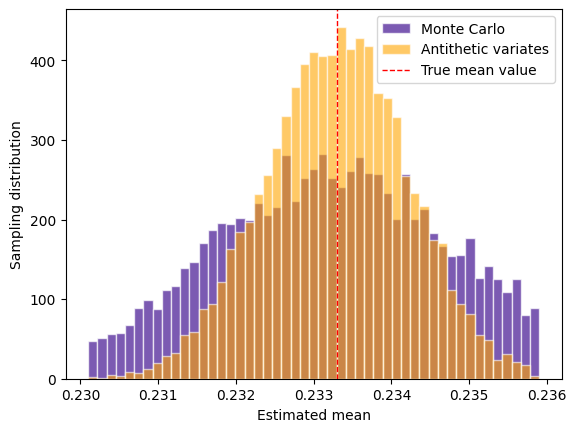

In [ ]:
# Compare between the sampling distribution of MC and MCAV methods

max_std=np.round(np.std(h_MC)*3,4)

bins = numpy.linspace( 0.233-max_std,0.233+max_std, 50)

plt.hist(h_MC, bins, alpha=0.7, label='Monte Carlo',density=True, color='#431492',edgecolor = "white")
plt.hist(h_MCAV, bins, alpha=0.6, label='Antithetic variates',density=True, color='orange',edgecolor = "white")
plt.axvline(0.2332969032, color='Red', linestyle='dashed', linewidth=1, label='True mean value')
plt.xlabel('Estimated mean')
plt.ylabel('Sampling distribution')
plt.legend(loc='upper right')
plt.show()
